#### <지도학습(Supervised Learning) >
- 데이터에 레이블을 달고, 그 레이블을 학습하는 모델
- 예) 분류모델 회귀
- 회귀는 결과값이 연속변수인 경우다.

#### <비지도 학습 >
- 레이블이 없다. 데이터만 보고 알아서 학습한다.
- 예) 군집(cluster), 차원축소

# 1. 회귀(Regression)
```
만약 주택의 널이, 가격 데이터를 가지고 주택가격을 예측하는 경우,
학습데이터 각각에 정답(주택가격)이 주어져 있으므로 지도학습 이며,
주택가격을 연속된 값으로 예측하는 것이므로, 회귀 문제다.
```
- 선형 회귀(Linear Regression) : 데이터를 가장 잘 설명하는 직선을 찾는 것

### 모델(가설)은 어떻게 만들어야 할까?

####  1 차함수인 경우
$
\quad h_\theta(x) = \theta_0 + \theta_1x
$

- 입력 변수(특징) x가 하나인 경우, 선형 회귀(Linear Regression) 문제는 주어진 학습데이터와 가장 잘 맞는 Hypothesis 함수 h를 찾는 문제다.

# 2. OLS (Ordinary Linear Least Square)
```
내가 찾고싶은 모델은 
```
$\quad \quad f(x) = ax + b $
```

이걸 벡터로 표현하면 아래와 같다
```

$
\quad \quad Y = AX \\ \\ \\  \\ \quad \quad Y=\begin{pmatrix}y_1\\y_2\\\vdots\\y_n \end{pmatrix}, \quad A=\begin{pmatrix}x_1&1\\x_2&1\\\vdots&\vdots\\x_n &1\end{pmatrix}, \quad X=\begin{pmatrix}a\\b\\ \end{pmatrix}
$

```

A가 정방행렬이 아니기 때문에 A의 역행렬을 양쪽에 곱해준다.
```
$
\quad \quad A^TAX = A^TY
$

```

이제 A^TA 가 정방행렬이기 때문에, A^TA의 역행렬을 양쪽에 곱할수 있다.
```
$
\quad \quad (A^TA)^{-1}A^TAX = (A^TA)^{-1}A^TY
$

```

이제 X를 찾을 수 있다.
```
$
\quad \quad X = (A^TA)^{-1}A^TY
$

In [2]:
#!pip install statsmodels

In [3]:
# 데이터 생성

import pandas as pd

data = {'x': [1., 2., 3., 4., 5.], 'y':[1., 3., 4., 6., 5.]}
df = pd.DataFrame(data)
df

,x,y
0,1.0,1.0
1,2.0,3.0
2,3.0,4.0
3,4.0,6.0
4,5.0,5.0


In [5]:
# 가설 세우기

import statsmodels.formula.api as smf

lm_model = smf.ols(formula="y~x", data=df).fit()

In [6]:
# 결과 확인

lm_model.params

Intercept    0.5
x            1.1
dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

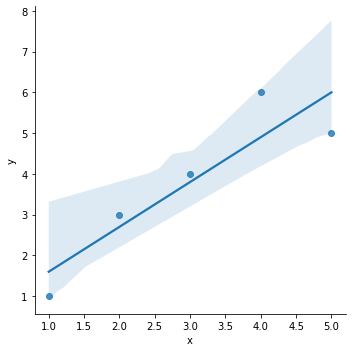

In [9]:
plt.fi
sns.lmplot(x="x", y="y", data=df);

### 잔차(residue)
- 잔차는 평균이 0인 정규분포를 따름 (따르는지 항상 확인하기!)

In [10]:
# 잔차 확인

resid = lm_model.resid
resid

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64

### 결정계수 (R-Squared)
- 결정계수가 높을수록 좋은 모델이다.

$
SST = SSE + SSR \\
R^2 =\frac{\displaystyle\sum_{i=1}^{n}{{(\widehat{y}-\mu)}^2}}{\displaystyle\sum_{i=1}^{n}{{(y-\mu)}^2}}\\
\quad  \quad  =\frac{SSR}{SST}
$

In [11]:
# numpy로 직접 결정계수 계산

import numpy as np

mu = np.mean(df.y)
y = df.y
yhat = lm_model.predict()
np.sum((yhat - mu)**2) / np.sum(((y - mu)**2))

0.8175675675675674

In [12]:
# 간단하게 구하기

lm_model.rsquared

0.8175675675675675

C:\Users\user\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


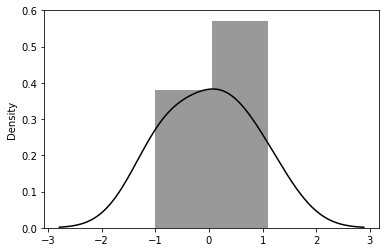

In [14]:
# 잔차의 분포 확인

sns.distplot(resid, color='black');

# 3. 통계적 회귀

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/ecommerce.csv"
data = pd.read_csv(data_url)

In [19]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


- 한 이커머스 회사의 고객 정보 데이터
- Avg. Session Length : 한번 접속했을 때 평균 어느정도의 시간을 사용하는지
- Time on App : 폰 앱으로 접속했을 때 유지 시간(분)
- Time on Website : 웹사이트로 접속했을 때 유지 시간 (분)
- Length of Membership : 회원 자격 유지 기간 (연)

In [20]:
# 필요없는 컬럼 삭제


data.drop(['Email', 'Address', 'Avatar'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


### 컬럼별 boxplot

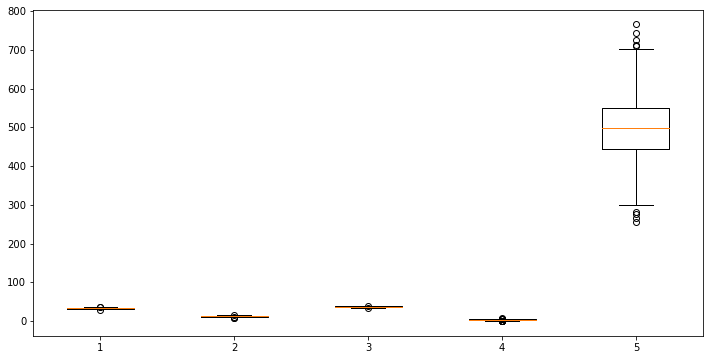

In [29]:
plt.figure(figsize=(12, 6))
plt.boxplot(x= data)
plt.show();

- Yearly Amount Spent 때문에 다른 컬럼이 잘 안보인다.

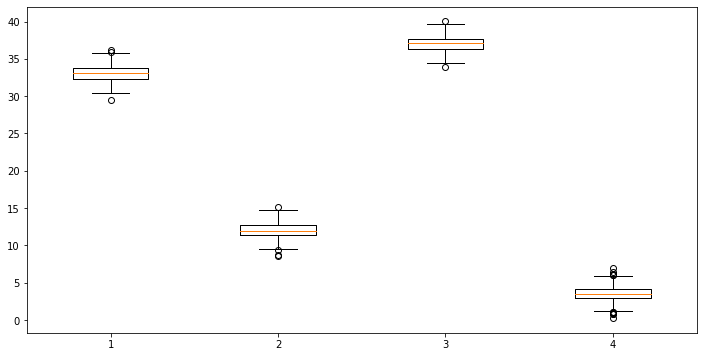

In [42]:
plt.figure(figsize=(12, 6))
plt.boxplot(x=data.iloc[:, :-1])
plt.show()

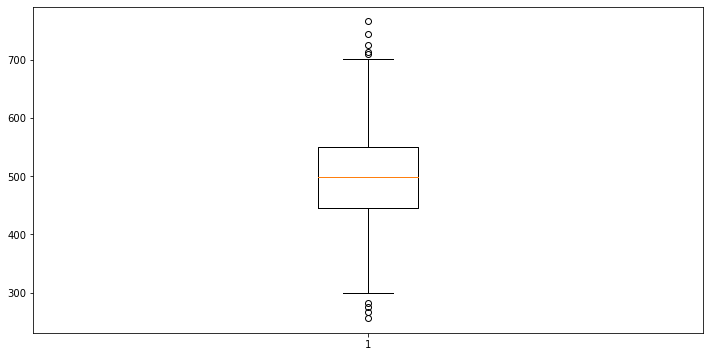

In [44]:
plt.figure(figsize=(12, 6))
plt.boxplot(x=data['Yearly Amount Spent'])
plt.show()

### pairplot 으로 경향 확인

<Figure size 864x432 with 0 Axes>

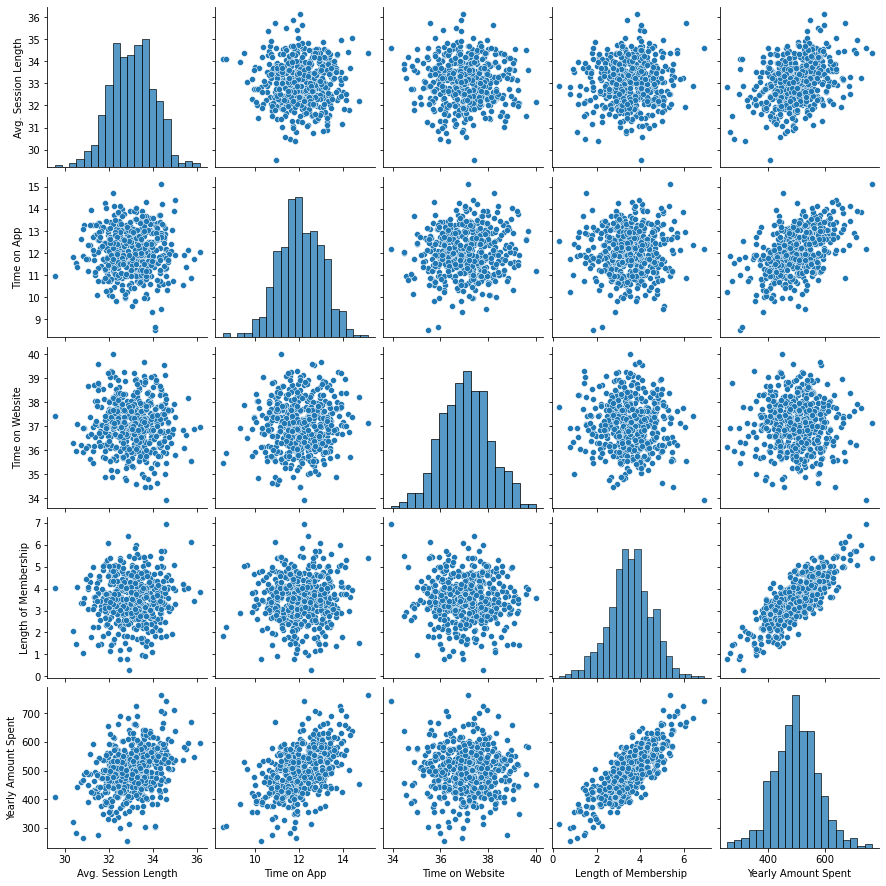

In [45]:
plt.figure(figsize=(12, 6))
sns.pairplot(data);

<Figure size 864x576 with 0 Axes>

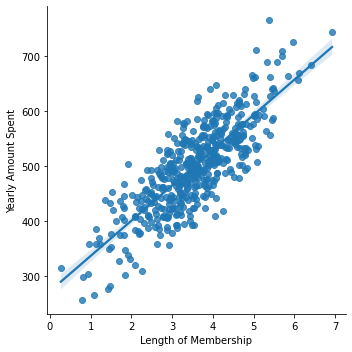

In [48]:
plt.figure(figsize=(12, 8))
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=data);

- Length of Membership 과 Yearly Amount Spent 은 상관이 있다.

### 상관이 높은 두 컬럼만 가지고 통게적 회귀

In [49]:
import statsmodels.api as sm

X = data['Length of Membership']
y = data['Yearly Amount Spent']
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.970
Model:                             OLS   Adj. R-squared (uncentered):              0.970
Method:                  Least Squares   F-statistic:                          1.617e+04
Date:                 Mon, 05 Sep 2022   Prob (F-statistic):                        0.00
Time:                         20:22:22   Log-Likelihood:                         -2945.2
No. Observations:                  500   AIC:                                      5892.
Df Residuals:                      499   BIC:                                      5897.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Length of Membership   135.6117      1.067    127.145      0.000     133.516     137.707
==============================================================================
Omnibus:                        1.408   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.472
Skew:                           0.125   Prob(JB):                        0.479
Kurtosis:                       2.909   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared : 모형 적합도. y의 분산을 각각의 변수들이 약 99.8%로 설명할수 있음
- Adj. R-squared : 독립변수가 여러개인 다중회귀분석에서 사용
- Prob (F-statistic) : 회귀모형에 대한 통계적 유의미성 검정. 이 값이 0.05 이하면 모집단에서도 의미있다고 볼수 있다.
- 상수항이 없는 모델이다.

### 회귀모델 그리기

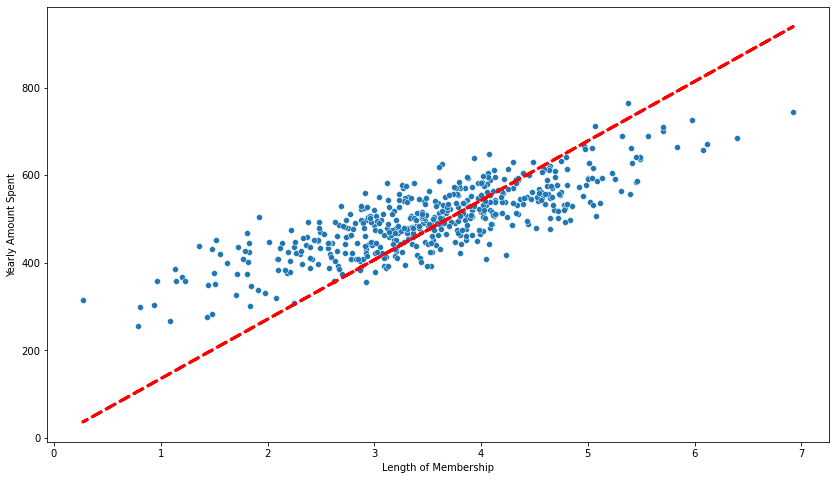

In [51]:
pred = lm.predict(X)

plt.figure(figsize=(14, 8))
sns.scatterplot(x=X, y=y)
plt.plot(X, pred, 'r', ls='dashed', lw=3);

- 상수항이 없어서 직선이 잘린 느낌. 상수항을 다시 만들어주자

In [56]:
# 상수항 넣어주기

X = np.c_[X, [1]*len(X)]
X

array([[4.08262063, 1.        ],
       [2.66403418, 1.        ],
       [4.1045432 , 1.        ],
       [3.12017878, 1.        ],
       [4.44630832, 1.        ],
       [5.4935072 , 1.        ],
       [4.68501725, 1.        ],
       [4.43427343, 1.        ],
       [3.27343358, 1.        ],
       [3.20280607, 1.        ],
       [2.48260777, 1.        ],
       [3.7132092 , 1.        ],
       [4.04642316, 1.        ],
       [3.91854184, 1.        ],
       [2.49454365, 1.        ],
       [3.35784684, 1.        ],
       [3.13613272, 1.        ],
       [2.42080616, 1.        ],
       [1.51657558, 1.        ],
       [4.06454855, 1.        ],
       [4.59993736, 1.        ],
       [1.55915194, 1.        ],
       [2.24514779, 1.        ],
       [3.91930231, 1.        ],
       [5.70515397, 1.        ],
       [2.72173599, 1.        ],
       [4.64819932, 1.        ],
       [2.99636453, 1.        ],
       [3.92348875, 1.        ],
       [4.74257752, 1.        ],
       [3.

In [57]:
# 다시 모델 fit

lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.655
Model:                             OLS   Adj. R-squared:                  0.654
Method:                  Least Squares   F-statistic:                     943.9
Date:                 Mon, 05 Sep 2022   Prob (F-statistic):          4.81e-117
Time:                         20:37:32   Log-Likelihood:                -2629.9
No. Observations:                  500   AIC:                             5264.
Df Residuals:                      498   BIC:                             5272.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            64.2187      2.090     30.723      0.000      60.112      68.326
const        272.3998      7.675     35.492      0.000     257.320     287.479
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared 값이 작아짐
- AIC : 원 데이터를 얼마나 손실시켰는지 정도..
- AIC 는 낮을수록 좋은데, 이번 모델에서 줄어듦
- R-squared 는 편차!
- R-squared 를 너무 믿으면 안된다는 의미!

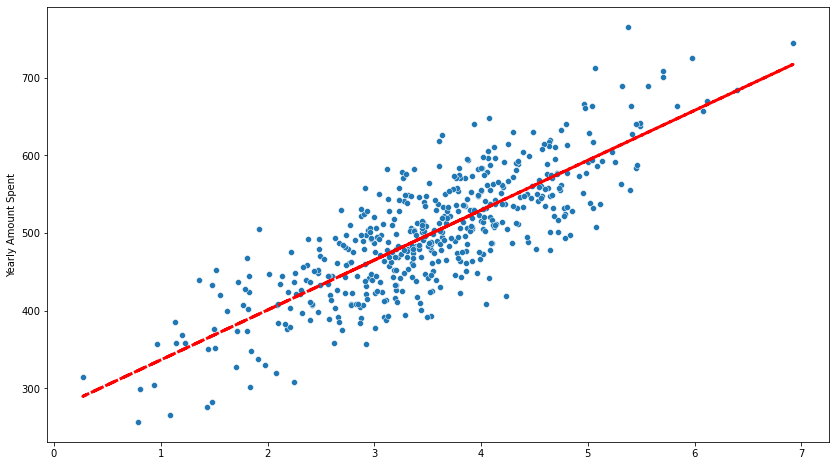

In [59]:
# 선형 회귀 결과

pred = lm.predict(X)

plt.figure(figsize=(14, 8))
sns.scatterplot(x=X[:, 0], y=y)
plt.plot(X[:, 0], pred, 'r', ls='dashed', lw=3);

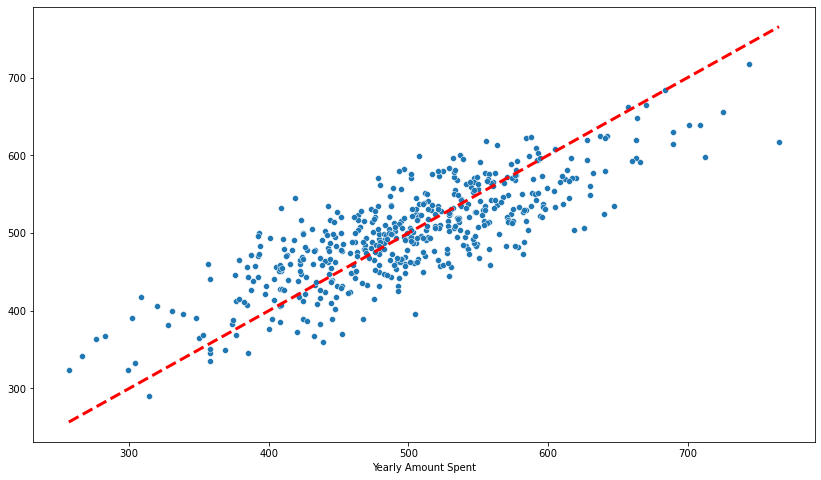

In [60]:
# 참값 VS 예측값

pred = lm.predict(X)

plt.figure(figsize=(14, 8))
sns.scatterplot(x=y, y=pred)  # 참값이 x, 예측값이 y
plt.plot([min(y), max(y)], [min(y), max(y)], 'r', ls='dashed', lw=3);   
    # 기울기가 1인 직선. 점들이 직선 주변에 있을수록 좋다.(차이가 없다는 의미)

### 데이터 분리해서 다시

In [62]:
from sklearn.model_selection import train_test_split

X = data.drop('Yearly Amount Spent', axis=1)
y = data['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [64]:
import statsmodels.api as sm

lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.179e+04
Date:                 Mon, 05 Sep 2022   Prob (F-statistic):                        0.00
Time:                         20:41:38   Log-Likelihood:                         -1591.7
No. Observations:                  350   AIC:                                      3191.
Df Residuals:                      346   BIC:                                      3207.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     11.8431      0.906     13.070      0.000      10.061      13.625
Time on App             35.2169      1.212     29.046      0.000      32.832      37.602
Time on Website        -14.2536      0.840    -16.960      0.000     -15.907     -12.601
Length of Membership    60.1702      1.275     47.183      0.000      57.662      62.678
==============================================================================
Omnibus:                        0.648   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.723   Jarque-Bera (JB):                0.755
Skew:                          -0.042   Prob(JB):                        0.686
Kurtosis:                       2.788   Cond. No.                         55.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

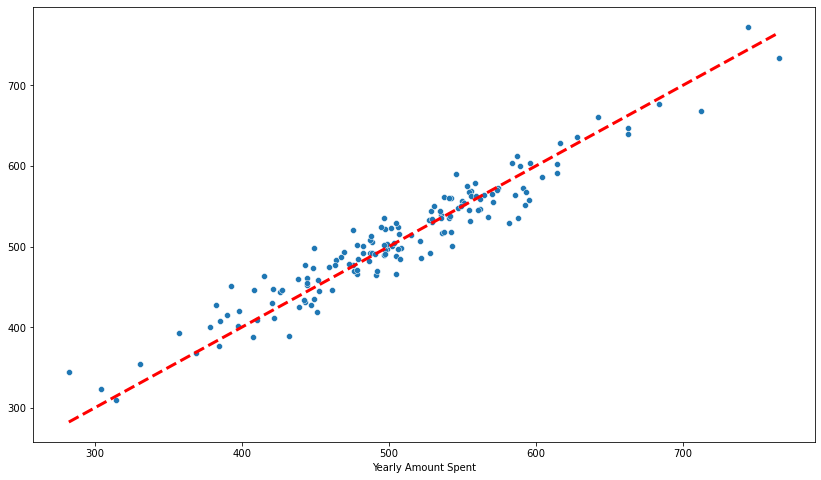

In [65]:
# 참값 VS 예측값

pred = lm.predict(X_test)

plt.figure(figsize=(14, 8))
sns.scatterplot(x=y_test, y=pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', ls='dashed', lw=3);